In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics

In [7]:
def get_results_PFLR_star():
    print('Results PFLR*')
    overall_acc_PFLR_star = []
    overall_risk_diff_PFLR_star = []

    results_PFLR_Star = pd.read_csv('~/dp-fairness-multi-objective-bayesian-optimisation/pfairdp/final_PFLR_star.csv')
    for noise_multiplier in [9, 1.27, 0.51]:
        fairness_after = []
        accuracy_after = []

        for idx, row in results_PFLR_Star.iterrows():
            if row['Noise multiplier'] == noise_multiplier:
                fairness_after.append(abs(row['Fairness after']))
                accuracy_after.append(1 - row['Classification error'])

        print(f'Noise multiplier {noise_multiplier}')
        print('Accuracy')
        print(f'{str(round(statistics.mean(accuracy_after), 4))} ± {str(round(statistics.stdev(accuracy_after), 4))}')
        print('Fairness')
        print(f'{str(round(statistics.mean(fairness_after), 4))} ± {str(round(statistics.stdev(fairness_after), 4))}')
        print()
        print()

        overall_acc_PFLR_star.append(round(statistics.mean(accuracy_after), 4))
        overall_risk_diff_PFLR_star.append(round(statistics.mean(fairness_after), 4))

    return overall_acc_PFLR_star, overall_risk_diff_PFLR_star

In [8]:
def get_results_PFLR():
    print('Results PFLR')
    overall_acc_PFLR = []
    overall_risk_diff_PFLR = []

    results_PFLR = pd.read_csv('~/dp-fairness-multi-objective-bayesian-optimisation/pfairdp/final_PFLR.csv')
    for noise_multiplier in [7, 1.07, 0.48]:
        fairness_after = []
        accuracy_after = []

        for idx, row in results_PFLR.iterrows():
            if row['Noise multiplier'] == noise_multiplier:
                fairness_after.append(abs(row['Fairness after']))
                accuracy_after.append(1 - row['Classification error'])

        print(f'Noise multiplier {noise_multiplier}')
        print('Accuracy')
        print(f'{str(round(statistics.mean(accuracy_after), 4))} ± {str(round(statistics.stdev(accuracy_after), 4))}')
        print('Fairness')
        print(f'{str(round(statistics.mean(fairness_after), 4))} ± {str(round(statistics.stdev(fairness_after), 4))}')
        print()
        print()

        overall_acc_PFLR.append(round(statistics.mean(accuracy_after), 4))
        overall_risk_diff_PFLR.append(round(statistics.mean(fairness_after), 4))

    return overall_acc_PFLR, overall_risk_diff_PFLR

In [9]:
def get_results_PrivLR():
    print('Results PrivLR')
    
    overall_acc_PrivLR = []
    overall_risk_diff_PrivLR = []

    results_PrivLR = pd.read_csv('~/dp-fairness-multi-objective-bayesian-optimisation/pfairdp/final_PrivLR.csv')
    for noise_multiplier in [7, 1.07, 0.48]:
        fairness_after = []
        accuracy_after = []

        for idx, row in results_PrivLR.iterrows():
            if row['Noise multiplier'] == noise_multiplier:
                fairness_after.append(abs(row['Fairness after']))
                accuracy_after.append(1 - row['Classification error'])

        print(f'Noise multiplier {noise_multiplier}')
        print('Accuracy')
        print(f'{str(round(statistics.mean(accuracy_after), 4))} ± {str(round(statistics.stdev(accuracy_after), 4))}')
        print('Fairness')
        print(f'{str(round(statistics.mean(fairness_after), 4))} ± {str(round(statistics.stdev(fairness_after), 4))}')
        print()
        print()

        overall_acc_PrivLR.append(round(statistics.mean(accuracy_after), 4))
        overall_risk_diff_PrivLR.append(round(statistics.mean(fairness_after), 4))

    return overall_acc_PrivLR, overall_risk_diff_PrivLR

    

Results PrivLR
Noise multiplier 7
Accuracy
0.7845 ± 0.0022
Fairness
0.0271 ± 0.0041


Noise multiplier 1.07
Accuracy
0.8027 ± 0.0006
Fairness
0.0699 ± 0.0019


Noise multiplier 0.48
Accuracy
0.8073 ± 0.0004
Fairness
0.0762 ± 0.0026


Results PFLR
Noise multiplier 7
Accuracy
0.7749 ± 0.0029
Fairness
0.0126 ± 0.0026


Noise multiplier 1.07
Accuracy
0.7981 ± 0.0008
Fairness
0.0321 ± 0.002


Noise multiplier 0.48
Accuracy
0.8024 ± 0.0004
Fairness
0.0339 ± 0.0009


Results PFLR*
Noise multiplier 9
Accuracy
0.7273 ± 0.0905
Fairness
0.0087 ± 0.0059


Noise multiplier 1.27
Accuracy
0.7526 ± 0.0647
Fairness
0.0098 ± 0.0065


Noise multiplier 0.51
Accuracy
0.7557 ± 0.0544
Fairness
0.0153 ± 0.0084




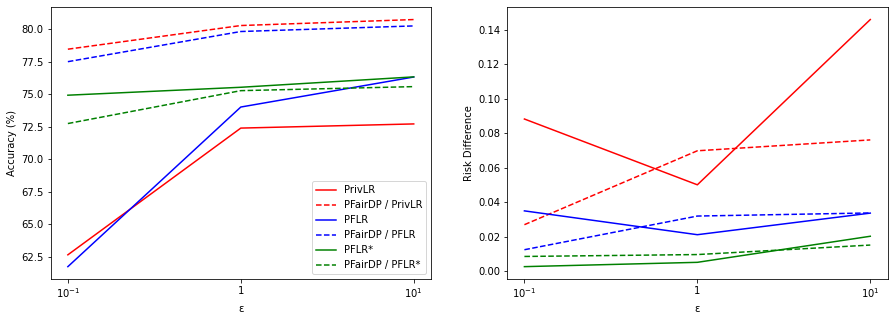

In [10]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (15,5)

def make_plot():
    # Hardcoded from the Xu et al. paper
    mean_acc_orig_privLR = [0.6263, 0.7238, 0.7270]
    mean_acc_orig_PFLR = [0.6172, 0.7400, 0.7631]
    mean_acc_orig_PFLR_star = [0.7491, 0.7552, 0.7632]

    risk_diff_privLR = [0.0883, 0.0502, 0.1459]
    risk_diff_PFLR = [0.0351, 0.0213, 0.0338]
    risk_diff_PFLR_star = [0.0028, 0.0053, 0.0204]

    mean_acc_PFairDP_privLR, risk_diff_PFairDP_privLR = get_results_PrivLR()
    mean_acc_PFairDP_PFLR, risk_diff_PFairDP_PFLR = get_results_PFLR()
    mean_acc_PFairDP_PFLR_star, risk_diff_PFairDP_PFLR_star = get_results_PFLR_star()

    fig, (ax1, ax2) = plt.subplots(1, 2)
    
    ax1.plot([0, 1, 2], [x * 100 for x in mean_acc_orig_privLR], color = 'red', label = 'PrivLR')
    ax1.plot([0, 1, 2], [x * 100 for x in mean_acc_PFairDP_privLR], color = 'red', label = 'PFairDP / PrivLR', linestyle = '--')

    ax1.plot([0, 1, 2], [x * 100 for x in mean_acc_orig_PFLR], color = 'blue', label = 'PFLR')
    ax1.plot([0, 1, 2], [x * 100 for x in mean_acc_PFairDP_PFLR], color = 'blue', label = 'PFairDP / PFLR', linestyle = '--')

    ax1.plot([0, 1, 2], [x * 100 for x in mean_acc_orig_PFLR_star], color = 'green', label = r'PFLR*')
    ax1.plot([0, 1, 2], [x * 100 for x in mean_acc_PFairDP_PFLR_star], color = 'green', label = r'PFairDP / PFLR*', linestyle = '--')

    ax1.set_xticks(np.array([0, 1, 2]), [r'$10^{-1}$', '1', r'$10^{1}$'])
    ax1.set_ylabel('Accuracy (%)')

    ax2.plot([0, 1, 2], risk_diff_privLR, color = 'red')
    ax2.plot([0, 1, 2], risk_diff_PFairDP_privLR, color = 'red', linestyle = '--')

    ax2.plot([0, 1, 2], risk_diff_PFLR, color = 'blue')
    ax2.plot([0, 1, 2], risk_diff_PFairDP_PFLR, color = 'blue', linestyle = '--')

    ax2.plot([0, 1, 2], risk_diff_PFLR_star, color = 'green')
    ax2.plot([0, 1, 2], risk_diff_PFairDP_PFLR_star, color = 'green', linestyle = '--')

    ax2.set_xticks(np.array([0, 1, 2]), [r'$10^{-1}$', '1', r'$10^{1}$'])
    ax2.set_ylabel('Risk Difference')

    ax1.set_xlabel('\u03B5')
    ax2.set_xlabel('\u03B5')

    ax1.legend()

    plt.savefig('logreg-comparison.png', dpi = 300)
make_plot()